In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_rossi, load_dd
from lifelines.plotting import add_at_risk_counts


# Kaplan-Meier Plot Democratic Regimes 

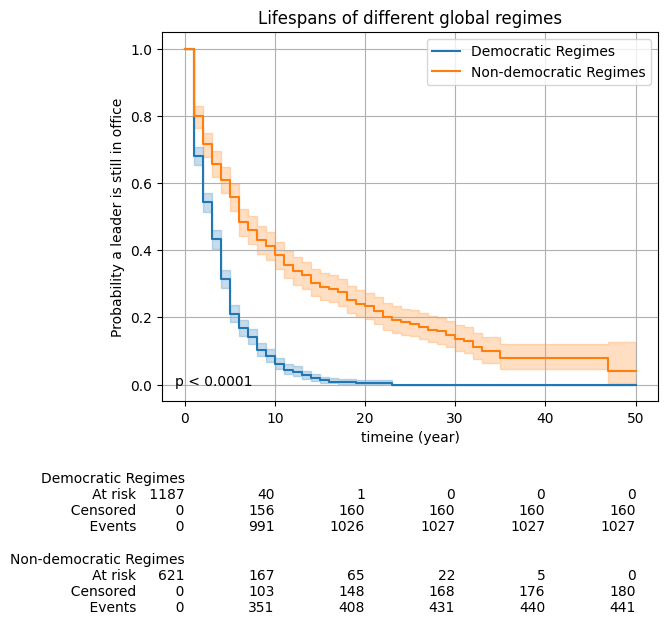

In [10]:
data = load_dd()
T = data["duration"]
E = data["observed"]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)

ind_dem = data["democracy"] == "Democracy"

kmf1.fit(T[ind_dem], event_observed=E[ind_dem], timeline=t, label="Democratic Regimes")
kmf1.plot(ax=ax)

kmf2.fit(T[~ind_dem], event_observed=E[~ind_dem], timeline=t, label="Non-democratic Regimes")
kmf2.plot(ax=ax)

add_at_risk_counts(kmf1, kmf2, ax=ax, fontsize=10, rows_to_show=["At risk", "Censored", "Events"])

plt.title("Lifespans of different global regimes");
# Calculate statistical significance
from lifelines.statistics import logrank_test
log_rank_test_result = logrank_test(T[ind_dem], T[~ind_dem], event_observed_A=E[ind_dem], event_observed_B=E[~ind_dem])
p_value = log_rank_test_result.p_value

p_value_string = 'p < 0.0001' if p_value < 0.0001 else f'p = {p_value:.4f}'
ax.add_artist(AnchoredText(p_value_string, loc=3, frameon=False))

ax.yaxis.grid() # horizontal lines
ax.xaxis.grid()
ax.set_xlabel("timeine (year)");
ax.set_ylabel("Probability a leader is still in office");
# plt.tight_layout()
plt.show();



# Barplot democratic regimes

1    1027
0     160
Name: observed, dtype: int64
1    441
0    180
Name: observed, dtype: int64


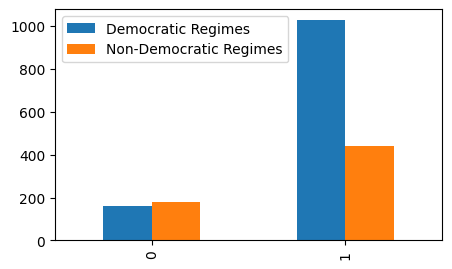

In [11]:
import pandas as pd
print(E[ind_dem].value_counts())
print(E[~ind_dem].value_counts())

# data[ind_dem]
labels = ["Democratic Regimes", "Non-Democratic Regimes"]
df = pd.DataFrame([(160, 180), (1027, 441)], index=[0, 1], columns=["Democratic Regimes","Non-Democratic Regimes", ])
df.plot.bar(figsize=(5, 3));

# Meta data on criminal recidivism data set

432 convicts who were released from Maryland state prisons in the 1970s and followed up for one year after release. Half the released convicts were assigned at random to an experimental treatment in which they were given financial aid, and the other half did not receive aid.

* week [duration]: of first arrest after release or censoring; all censored observations are censored at 52 weeks.
* arrest [event]:  1 if the released convict was rearrested and 0 otherwise
* fin: yes if the convict received financial aid and no if did not.
* age: The convict’s age in years at the time of release.
* race: The convict’s race, a factor with levels black and other.
* wexp: the convict’s full-time work experience prior to incarceration, a factor coded no or yes.
* mar: the convict’s marital status at the time of release, a factor coded married or not married.
* paro: whether or not the convict was released on parole, a factored coded no or yes.
* prio: the number of convictions prior to the current conviction.
* educ: level of education, coded numerically: 2 = 6th grade or less; 3 = 7th to 9th grade; 4 = 10th to 11th grade; 5 = 12th grade; and 6 = some college.
* emp1: employment status in the first week after release, a factor with levels no and yes



# Kaplan-Meier Plot Criminal Recidivism

In [37]:

rossi = load_rossi()

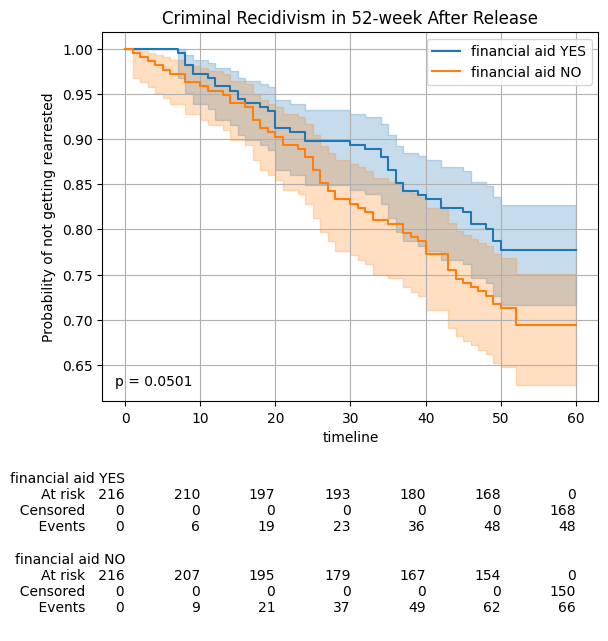

In [38]:
T = rossi["week"]
E = rossi["arrest"]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
ax = plt.subplot(111)

t = np.linspace(0, 60, 61)

ind_fin = rossi["fin"] == 1

kmf1.fit(T[ind_fin], event_observed=E[ind_fin], timeline=t, label="financial aid YES")
kmf1.plot(ax=ax)

kmf2.fit(T[~ind_fin], event_observed=E[~ind_fin], timeline=t, label="financial aid NO")
kmf2.plot(ax=ax)

add_at_risk_counts(kmf1, kmf2, ax=ax, fontsize=10, rows_to_show=["At risk", "Censored", "Events"])

plt.title("Criminal Recidivism in 52-week After Release");

ax.set_ylabel("Probability of not getting rearrested");

from lifelines.statistics import logrank_test
log_rank_test_result = logrank_test(T[ind_fin], T[~ind_fin], event_observed_A=E[ind_fin], event_observed_B=E[~ind_fin])
p_value = log_rank_test_result.p_value

p_value_string = 'p < 0.0001' if p_value < 0.0001 else f'p = {p_value:.4f}'
ax.add_artist(AnchoredText(p_value_string, loc=3, frameon=False))

ax.yaxis.grid() # horizontal lines
ax.xaxis.grid()
# plt.tight_layout()
plt.show();

0    168
1     48
Name: arrest, dtype: int64
0    150
1     66
Name: arrest, dtype: int64


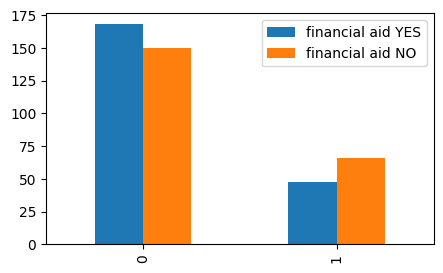

In [39]:
import pandas as pd
print(E[ind_fin].value_counts())
print(E[~ind_fin].value_counts())

labels = ["financial aid YES", "financial aid NO"]
df = pd.DataFrame([(168, 150), (48, 66)], index=[0, 1], columns=labels)
df.plot.bar(figsize=(5, 3));